In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

#Loading Titanic dataset
df_titanic = pd.read_csv('Titanic.csv')
df_titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
# get the number of missing data points per column
missing_values_count = df_titanic.isnull().sum()

# look at the # of missing points in the all columns
missing_values_count[:]




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there are 177 missing data in Age field , Cabin has 687 and Embarked has 2 missing data (NaN)

0    549
1    342
Name: Survived, dtype: int64


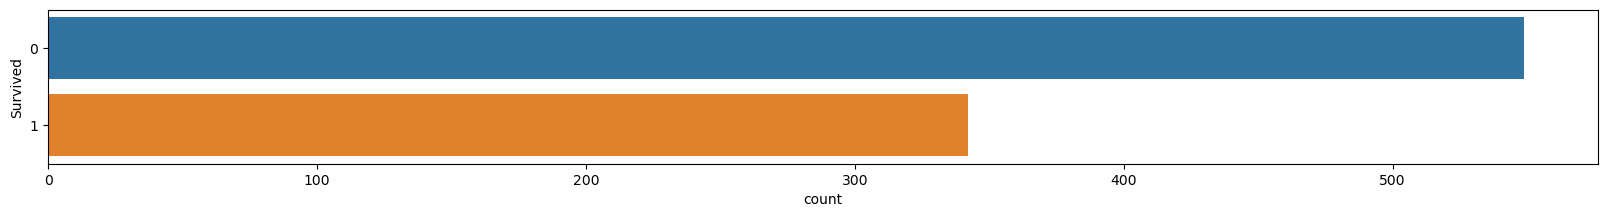

In [3]:
#People survived 
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Survived',data=df_titanic)
print(df_titanic.Survived.value_counts())




Most important factor in determining the survival of the Titanic Incident ,around 549 people have died and 342 people have survived in the incident.

3    491
1    216
2    184
Name: Pclass, dtype: int64


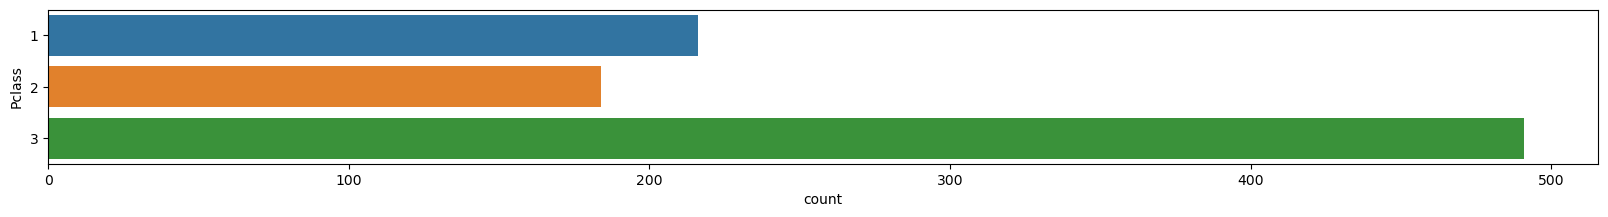

In [4]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y=df_titanic['Pclass'], data=df_titanic);
print(df_titanic.Pclass.value_counts())

We can see that people travelled in Third Class were more than in second and First class.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

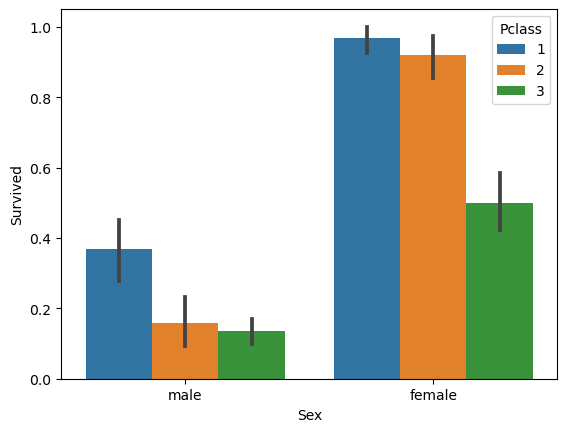

In [5]:
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = df_titanic)

we have more females survivers than male .
Also First class survivers were more in both male and female gender 
hence we can conclude that upper class people were given more preferrence on lifeboats.

In [6]:
print(df_titanic.groupby('Embarked').size())


Embarked
C    168
Q     77
S    644
dtype: int64


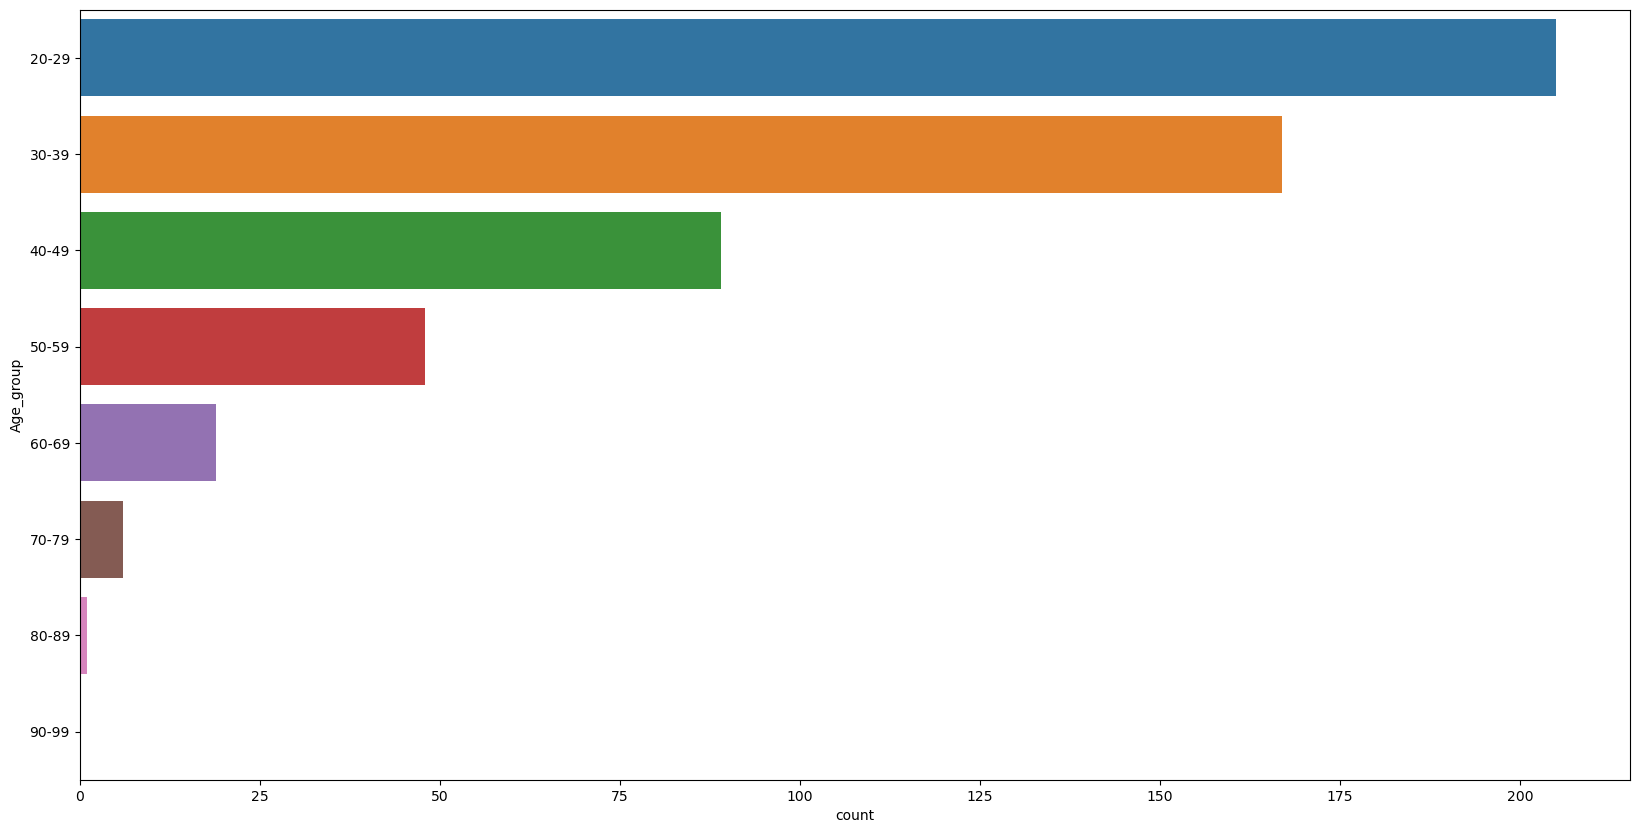

In [7]:
df_titanic['Age_group'] = pd.cut(df_titanic['Age'], [20, 29, 39,49, 59,69,79,89,99], 
                   labels=['20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_titanic['Age_group'], data=df_titanic);

From the above plot,it clearly shows majority of members were from age group from 20 to 30 years of age.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

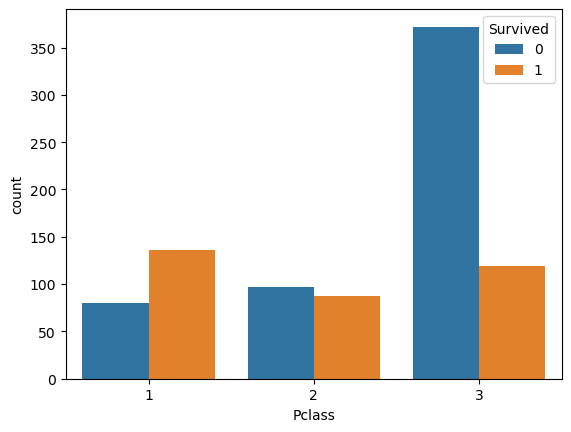

In [8]:
sns.countplot('Pclass',hue='Survived',data=df_titanic)

Number of people who survived more were from first class when compared to other classes.

### Women and Children First!

As per the survival count, I can guess women and children were given first preference but there is no sufficient data to confirm  the same.

### One More Observation noted:

<AxesSubplot:ylabel='Embarked'>

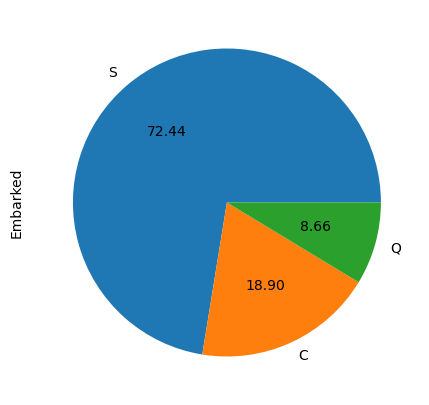

In [13]:
df_titanic['Embarked'].value_counts().plot.pie(figsize=(5,5), autopct='%.2f')

From the above Pie chart , we can confirm that most of the passengers have Embarked from southampton